# Data Prep and Preprocessing

- In machine learning a most of your time will be spent preparing your data.
- Preprocessing and feature engineering are important steps to getting your data ready for a machine learning algorithm

In [234]:
import pandas as pd
import numpy as np
import re

In [235]:
# hidden code.....
# df = pd.read_csv('utah_snow_pack.csv')
# df.columns = [re.sub(r'[^\w]+', '_', x) for x in df.columns.str.lower()]
# df['date'] = pd.to_datetime(df['date'])
# df['date_string'] = df['date'].dt.strftime('%b %d %y').str.replace('Sep', 'Sept.')
# df.pivot(index=['station_name', 'station_id'], columns='date_string', values='snow_depth_in_start_of_day_values').reset_index().to_csv('utah_snow_pack_wide.csv', index=False)

In [236]:
df = pd.read_csv('utah_snow_pack_wide.csv', dtype={'station_id': str})
df.head()

,station_name,station_id,Apr 01 24,Apr 02 24,Apr 03 24,Apr 04 24,Apr 05 24,Apr 06 24,Apr 07 24,Apr 08 24,...,Sept. 21 24,Sept. 22 24,Sept. 23 24,Sept. 24 24,Sept. 25 24,Sept. 26 24,Sept. 27 24,Sept. 28 24,Sept. 29 24,Sept. 30 24
0,Agua Canyon,907,30.0,32.0,27.0,25.0,23.0,24.0,24.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Atwater,1308,120.0,119.0,113.0,108.0,105.0,109.0,122.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bear River RS,992,35.0,35.0,35.0,33.0,32.0,32.0,32.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Beaver Dams,329,32.0,31.0,30.0,27.0,27.0,28.0,31.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Beaver Divide,330,47.0,46.0,44.0,42.0,40.0,41.0,40.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# [Tidy Data](https://r4ds.hadley.nz/data-tidy.html)

- Each row is an observation
- Each column is a variable or dimension
- Each "cell" is a piece of data or value
- There is no data in column names
- pd.melt and pd.pivot are helpful to transform data from rows to columns

In [237]:
df_long = df.melt(id_vars=['station_name', 'station_id'], var_name='date_str', value_name='snow_depth')
df_long.head()

,station_name,station_id,date_str,snow_depth
0,Agua Canyon,907,Apr 01 24,30.0
1,Atwater,1308,Apr 01 24,120.0
2,Bear River RS,992,Apr 01 24,35.0
3,Beaver Dams,329,Apr 01 24,32.0
4,Beaver Divide,330,Apr 01 24,47.0


In [238]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55413 entries, 0 to 55412
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  55413 non-null  object 
 1   station_id    55413 non-null  object 
 2   date_str      55413 non-null  object 
 3   snow_depth    54857 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


# Convert date

- Need format
- Be careful trying to convert more than once (running the below cell more than once)

In [239]:
df_long['date'] = pd.to_datetime(df_long['date_str'].str.replace('Sept.', 'Sep'), format='%b %d %y')

df_long

,station_name,station_id,date_str,snow_depth,date
0,Agua Canyon,907,Apr 01 24,30.0,2024-04-01
1,Atwater,1308,Apr 01 24,120.0,2024-04-01
2,Bear River RS,992,Apr 01 24,35.0,2024-04-01
3,Beaver Dams,329,Apr 01 24,32.0,2024-04-01
4,Beaver Divide,330,Apr 01 24,47.0,2024-04-01
...,...,...,...,...,...
55408,Widtsoe #3,865,Sept. 30 24,0.0,2024-09-30
55409,Wilbur Bench,543,Sept. 30 24,0.0,2024-09-30
55410,Wolf Creek Peak,1164,Sept. 30 24,0.0,2024-09-30
55411,Wrigley Creek,1228,Sept. 30 24,0.0,2024-09-30


In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(df_long, x='date', y='snow_depth', hue='station_name')
plt.show()

In [241]:
df_long['station_name'].value_counts()

station_name
Agua Canyon          393
Oak Creek            393
Mining Fork          393
Monte Cristo         393
Mosby Mtn.           393
                    ... 
Farmington           393
Elk Ridge            393
East Willow Creek    393
EF Blacks Fork GS    393
Yankee Reservoir     393
Name: count, Length: 141, dtype: int64

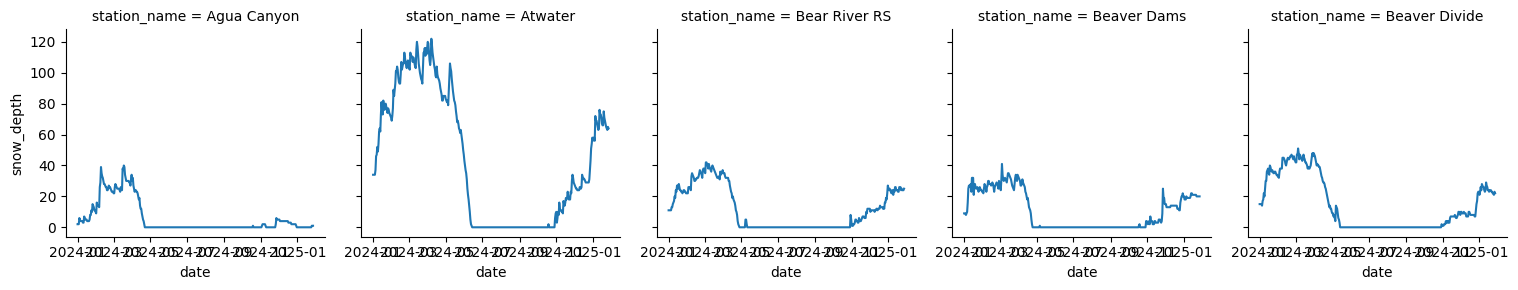

In [242]:
g = sns.FacetGrid(df_long[df_long['station_name'].isin(df_long['station_name'].unique()[:5])], col="station_name", col_wrap=11)
g.map(sns.lineplot,'date', 'snow_depth')
plt.show()

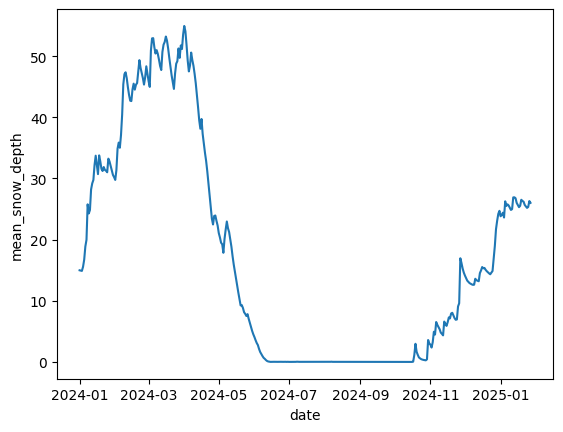

In [243]:
summary = df_long.groupby(['date'], as_index=False).agg(mean_snow_depth = ('snow_depth', 'mean'))
sns.lineplot(summary, x='date', y='mean_snow_depth')
plt.show()

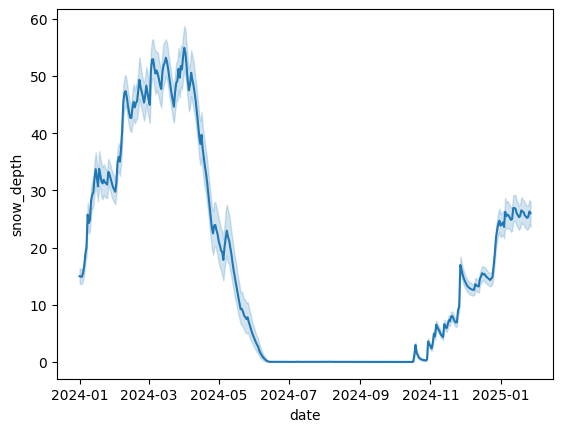

In [244]:
sns.lineplot(df_long, x='date', y='snow_depth')
plt.show()

In [245]:
df = pd.read_csv('utah_snow_pack.csv')
df.columns = [re.sub(r'[^\w]+', '_', x) for x in df.columns.str.lower()]
df.head()

,date,station_name,station_id,state_code,state_name,network_code,network_name,elevation_ft_,latitude,longitude,county_name,county_code,start_date,end_date,snow_depth_in_start_of_day_values
0,2024-01-01,Agua Canyon,907,UT,UTAH,SNTL,SNOTEL,8890,37.52217,-112.27118,Kane,25,1994-10-01,2100-01-01,2.0
1,2024-01-02,Agua Canyon,907,UT,UTAH,SNTL,SNOTEL,8890,37.52217,-112.27118,Kane,25,1994-10-01,2100-01-01,2.0
2,2024-01-03,Agua Canyon,907,UT,UTAH,SNTL,SNOTEL,8890,37.52217,-112.27118,Kane,25,1994-10-01,2100-01-01,2.0
3,2024-01-04,Agua Canyon,907,UT,UTAH,SNTL,SNOTEL,8890,37.52217,-112.27118,Kane,25,1994-10-01,2100-01-01,6.0
4,2024-01-05,Agua Canyon,907,UT,UTAH,SNTL,SNOTEL,8890,37.52217,-112.27118,Kane,25,1994-10-01,2100-01-01,5.0


In [246]:
df = df.rename({'snow_depth_in_start_of_day_values':'snow_depth'}, axis=1)

In [247]:
stations = df.groupby(['station_name', 'station_id', 'latitude', 'longitude', 'elevation_ft_'], as_index=False).agg(mean_snow_depth = ('snow_depth', 'mean'))
stations.head()

,station_name,station_id,latitude,longitude,elevation_ft_,mean_snow_depth
0,Agua Canyon,907,37.52217,-112.27118,8890,5.885496
1,Atwater,1308,40.59124,-111.63775,8750,43.503817
2,Bear River RS,992,40.88520,-110.82770,8510,11.513995
3,Beaver Dams,329,39.13683,-111.55813,7970,10.419847
4,Beaver Divide,330,40.61233,-111.09782,8230,14.318066


In [248]:
stations.sort_values('mean_snow_depth', ascending=False)

,station_name,station_id,latitude,longitude,elevation_ft_,mean_snow_depth
96,NWCC Test Silver Fox,5016,40.56734,-111.64718,9890,56.282759
1,Atwater,1308,40.59124,-111.63775,8750,43.503817
115,Snowbird,766,40.56914,-111.65852,9170,40.264103
127,Tony Grove Lake,823,41.89833,-111.62957,8450,39.432570
41,Farmington,474,40.97462,-111.80975,7920,38.671756
...,...,...,...,...,...,...
81,Long Flat,592,37.51255,-113.39661,7990,4.111959
54,Gutz Peak,1065,37.49617,-113.94235,6800,4.096692
98,Panguitch Lake RS,1148,37.70463,-112.65037,8300,3.794872
82,Long Valley Jct,593,37.48756,-112.51458,7460,2.231552


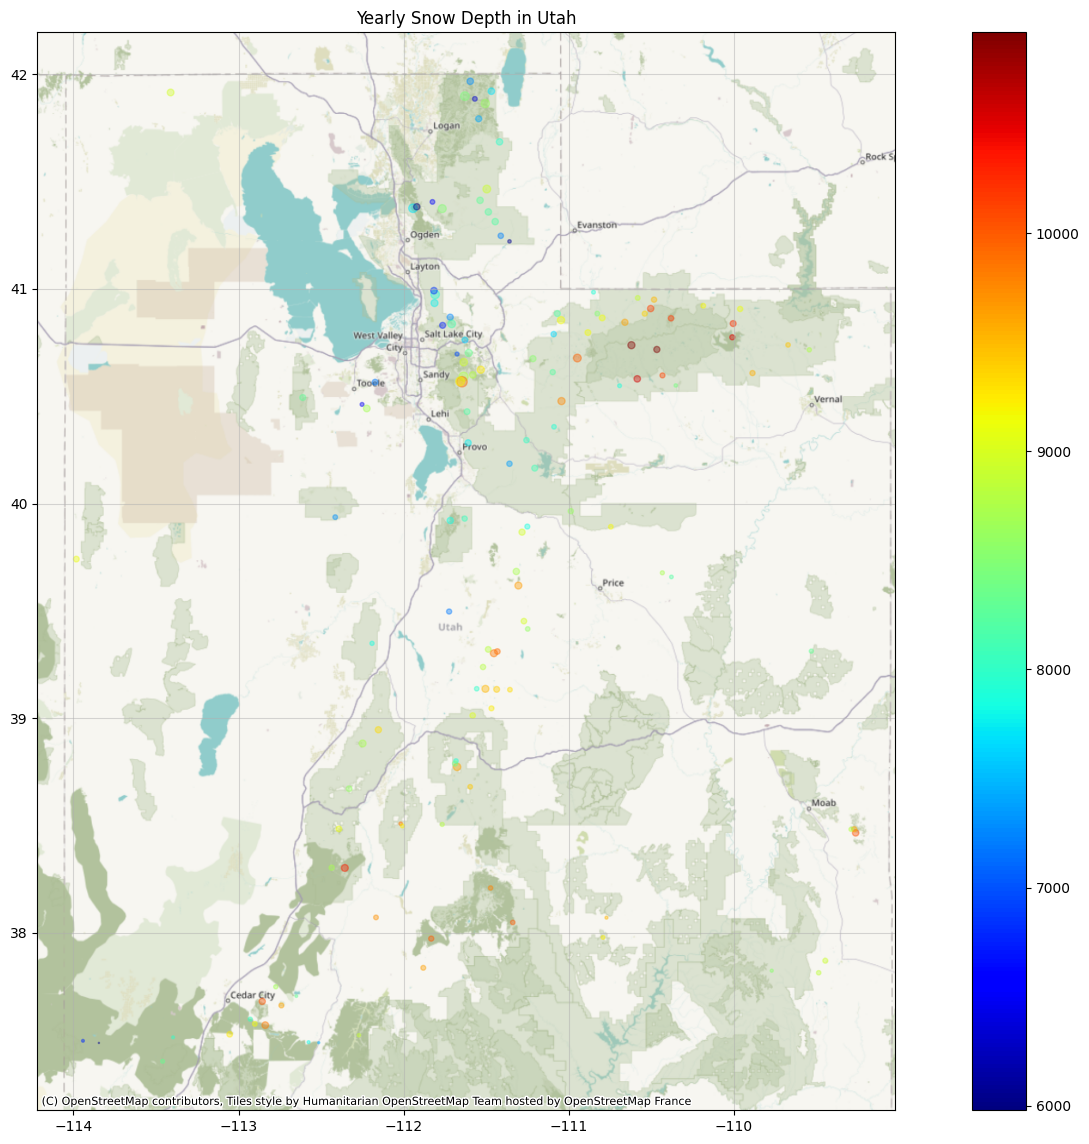

In [249]:
import geopandas as gpd
from geodatasets import get_path
import matplotlib.pyplot as plt
import contextily as cx

gdf = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations.longitude, stations.latitude), crs="EPSG:4326")
# initialize an axis
fig, ax = plt.subplots(figsize=(20,14))
# plot points
gdf.plot(column='elevation_ft_', markersize='mean_snow_depth', ax=ax, cmap='jet', legend=True, alpha=0.4)
cx.add_basemap(ax, crs=gdf.crs)
# add grid
ax.grid(alpha=0.5)
plt.title('Yearly Snow Depth in Utah')
plt.show()

In [250]:
stations.corr(numeric_only=True) #uses pearson correlation by deafult ( ranges from -1 to 1) & numeric_only=True considers only numeric cols
'''
    corr tells which var is strongest predictor which one.
    ex: elevation vs mean snow depth: 0.19( weak correlation) ; high elevation might not be more snow
    long have weak correlations, meaning location alone isn't a strong factor.
'''

,station_id,latitude,longitude,elevation_ft_,mean_snow_depth
station_id,1.000000,-0.010402,-0.046327,0.010290,0.221195
latitude,-0.010402,1.000000,0.307640,-0.226298,0.477588
longitude,-0.046327,0.307640,1.000000,0.307844,-0.024681
elevation_ft_,0.010290,-0.226298,0.307844,1.000000,0.199592
mean_snow_depth,0.221195,0.477588,-0.024681,0.199592,1.000000


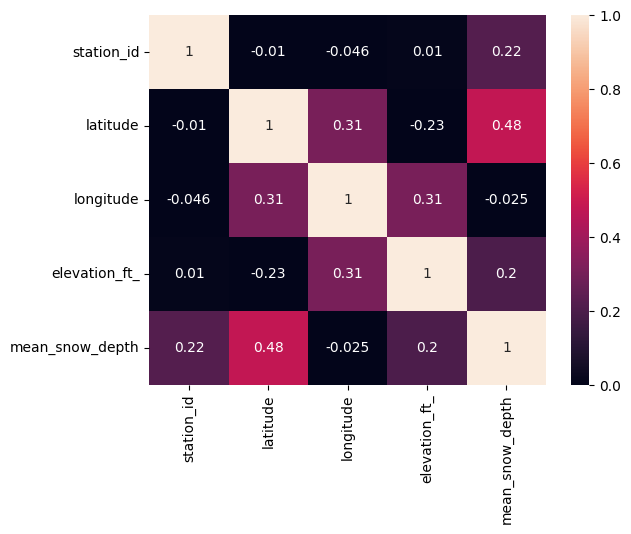

In [251]:
sns.heatmap(stations.corr(numeric_only=True), annot=True, vmin=0, vmax=1)
plt.show()
'''.
Computes the correlation matrix between all numeric columns in the stations DataFrame 
(i.e., latitude, longitude, elevation_ft_, mean_snow_depth).
annot=True: Displays the correlation coefficients directly inside the heatmap cells
vmin=0, vmax=1: The color scale will range from 0 (no correlation) to 1 (perfect positive correlation)

interpret
- diagonal vals will be 1; since a var is perfectly correlated with itself
- off diagonal vals- high correlation is shown by deeper color
- a lower correlation is shown by lighter colors 
- Positive correlation (closer to +1) → When one variable increases, the other also increases.
- Negative correlation (closer to -1) → When one variable increases, the other decreases
- Zero correlation (~0) → No relationship (completely random)
- 
'''

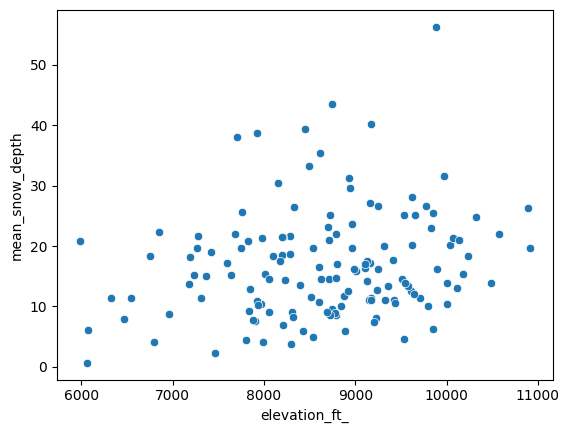

In [252]:
sns.scatterplot(stations, x='elevation_ft_', y='mean_snow_depth')
plt.show()
'''.
If the points form an upward trend, it means higher elevation = more snow depth (positive correlation).
If they form a downward trend, it means higher elevation = less snow depth (negative correlation).
If points are randomly scattered, it means there's no strong relationship between elevation and snow depth.

'''

# Train-Test Split

- First thing to do is to create a train-test split so we know how are model **generalizes** to new/unseen data

In [253]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [254]:
from sklearn.model_selection import train_test_split

# Can split data in X and y first, if you want
X = df.drop('Price', axis=1)  #drop 'price'
y = df['Price'] #target var (what we want to predict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#20 % of data is used for testing & 80% for training
train, test = train_test_split(df, test_size=0.2, random_state=42)
# the above is alternate splitting method; this keeps the full dataset structure but still separates 20% for testing.

# Stratification

- Want to check if you split is stratified or contains the same proportion of values in each class in the training and test.  
    - ***Mostly stratify by label (y variable)***, but can also stratify by other variables
- Easiest way to do this is use `stratify` argument in `train_test_split`


In [255]:
df['Regionname'].value_counts(normalize=True)
# our df has diff regions with following proportions.

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: proportion, dtype: float64

In [256]:
train['Regionname'].value_counts(normalize=True)
'''
 looks like our train proportions are very close to original dataset 
ex: "Southern Metropolitan" is 34.59% in train (vs 34.57% in df). diff is small
 '''

Regionname
Southern Metropolitan         0.345913
Northern Metropolitan         0.287095
Western Metropolitan          0.216679
Eastern Metropolitan          0.107603
South-Eastern Metropolitan    0.033689
Eastern Victoria              0.003406
Northern Victoria             0.003130
Western Victoria              0.002485
Name: proportion, dtype: float64

In [257]:
test['Regionname'].value_counts(normalize=True)
'''.
Slightly different from the original dataset df
"Southern Metropolitan" is 34.49% in test (vs 34.57% in df).

final stats:
Your train-test split is fairly balanced, but there are minor shifts in proportions.
if we need exact proportins we ***stratify***
'''


Regionname
Southern Metropolitan         0.344993
Northern Metropolitan         0.283873
Western Metropolitan          0.218704
Eastern Metropolitan          0.111193
South-Eastern Metropolitan    0.030928
Eastern Victoria              0.005891
Northern Victoria             0.002577
Western Victoria              0.001841
Name: proportion, dtype: float64

In [258]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Regionname'])

In [259]:
df['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217084
Eastern Metropolitan          0.108321
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003903
Northern Victoria             0.003019
Western Victoria              0.002356
Name: proportion, dtype: float64

In [260]:
train['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217047
Eastern Metropolitan          0.108339
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.003866
Northern Victoria             0.003038
Western Victoria              0.002393
Name: proportion, dtype: float64

In [261]:
test['Regionname'].value_counts(normalize=True)

Regionname
Southern Metropolitan         0.345729
Northern Metropolitan         0.286451
Western Metropolitan          0.217231
Eastern Metropolitan          0.108247
South-Eastern Metropolitan    0.033137
Eastern Victoria              0.004050
Northern Victoria             0.002946
Western Victoria              0.002209
Name: proportion, dtype: float64

In [262]:
def compare_strat(df, v_name):
    train, _ = train_test_split(df, test_size=0.2, random_state=42)
    train_strat, _ = train_test_split(df, test_size=0.2, random_state=42, stratify=df[v_name])
    combined = pd.DataFrame({'overall': df[v_name].value_counts(normalize=True)*100,
                            'stratified': train_strat[v_name].value_counts(normalize=True)*100,
                            'random': train[v_name].value_counts(normalize=True)*100}).reset_index()
    combined['strat_error'] = (combined['stratified'] /
                            combined['overall'] - 1)*100
    combined['random_error'] = (combined['random'] / combined['overall'] - 1)*100
    return combined

compare_strat(df, 'Regionname')
'''.
    in op below since the stratification is sucessfull; the error is close to 0%
    if split is random; the eroor will be higher ( random_error)
'''

,Regionname,overall,stratified,random,strat_error,random_error
0,Southern Metropolitan,34.572901,34.572901,34.591311,0.000000,0.053248
1,Northern Metropolitan,28.645066,28.645066,28.709499,0.000000,0.224936
2,Western Metropolitan,21.708395,21.704713,21.667894,-0.016961,-0.186567
3,Eastern Metropolitan,10.832106,10.833947,10.760309,0.016995,-0.662814
4,South-Eastern Metropolitan,3.313697,3.313697,3.368925,0.000000,1.666667
5,Eastern Victoria,0.390280,0.386598,0.340574,-0.943396,-12.735849
6,Northern Victoria,0.301915,0.303756,0.312960,0.609756,3.658537
7,Western Victoria,0.235641,0.239323,0.248527,1.562500,5.468750


# Data Imbalance

- Sometimes data can be imbalanced with respect to certain attributes especially the target variable in classification
- This imbalance can be handled in a number of ways
    - Undersampling
    - Oversampling
    - SMOTE

# Install Imbalanced Learn

In [263]:
#!pip install imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Undersampling

- under sample from the smaller class

In [264]:
# Lets create an unbalanced data set
train['target'] = train['Regionname'].apply(lambda x:'eastern_metro' if x=='Eastern Metropolitan' else 'not_eastern_metro')
train['target'].value_counts(normalize=True)

'''.
    This output shows that the dataset is imbalanced
    "eastern_metro" class only makes up 10.83% of the data
    while "not_eastern_metro" dominates with 89.17%.

    Undersampling: Reduce the majority class to match the minority class.
        pros        Balances data, prevents bias.
        cons        loses valuable data from majority class
    Oversampling: Duplicate samples from the minority class to match the majority.
        pros        keeps data
        cons        can overfit if not handled properly
    SMOTE: Creates synthetic samples of the minority class.
        pros        Creates new data instead of duplicating.
        cons        Might introduce noise if not applied carefully.
'''

target
not_eastern_metro    0.891661
eastern_metro        0.108339
Name: proportion, dtype: float64

In [265]:
train['target'].value_counts()

target
not_eastern_metro    9687
eastern_metro        1177
Name: count, dtype: int64

In [266]:
undersampler = RandomUnderSampler(random_state=42)
train_undersampled, target_undersampled = undersampler.fit_resample(train, train['target'])
train_undersampled['target'].value_counts()

'''.
    After undersampling we have both classes with equal num 1177 of observations
    pros:
    Faster training- since there’s less data, training will be quicker.
    Reduces overfitting → Prevents the model from memorizing majority class patterns.
    Balanced dataset → The model won’t be biased toward the majority class.
    cons:
    Loss of information → You’re removing data from the majority class
    Risk of underfitting → If too much data is removed, the model may not learn enough patterns. 
'''

target
eastern_metro        1177
not_eastern_metro    1177
Name: count, dtype: int64

Be careful of:
    - Loss of information.  You can lose valuable information from dropped observations
    - If too much data is removed, you may underfit

On the other hand:
    - You will train your model fast with less data
    - You will avoid overfitting to the majority class

# Oversampling

- over sample from the bigger class

In [267]:
oversampler = RandomOverSampler(random_state=42)
train_oversampled, target_oversampled = oversampler.fit_resample(train, train['target'])
train_oversampled['target'].value_counts()

target
not_eastern_metro    9687
eastern_metro        9687
Name: count, dtype: int64

In [268]:
# Can specify the proportion as well
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
train_oversampled, target_oversampled = oversampler.fit_resample(train, train['target'])
train_oversampled['target'].value_counts()

target
not_eastern_metro    9687
eastern_metro        4843
Name: count, dtype: int64

# Works with multiclass too

In [269]:
train['Regionname'].value_counts()

Regionname
Southern Metropolitan         3756
Northern Metropolitan         3112
Western Metropolitan          2358
Eastern Metropolitan          1177
South-Eastern Metropolitan     360
Eastern Victoria                42
Northern Victoria               33
Western Victoria                26
Name: count, dtype: int64

In [270]:
oversampler = RandomOverSampler(random_state=42)
train_oversampled, target_oversampled = oversampler.fit_resample(train, train['Regionname'])
train_oversampled['Regionname'].value_counts()

Regionname
Northern Metropolitan         3756
Western Metropolitan          3756
Southern Metropolitan         3756
Eastern Metropolitan          3756
Eastern Victoria              3756
South-Eastern Metropolitan    3756
Northern Victoria             3756
Western Victoria              3756
Name: count, dtype: int64

In [271]:
undersampler = RandomUnderSampler(random_state=42)
train_undersampled, target_undersampled = undersampler.fit_resample(train, train['Regionname'])
train_undersampled['Regionname'].value_counts()

Regionname
Eastern Metropolitan          26
Eastern Victoria              26
Northern Metropolitan         26
Northern Victoria             26
South-Eastern Metropolitan    26
Southern Metropolitan         26
Western Metropolitan          26
Western Victoria              26
Name: count, dtype: int64

- Be careful with oversampling.  
    - You will have lots of duplicate entries, especially for classes that are much smaller than the largest class
    - Can introduce noise with oversampling
    - Will increase training time with more data
    - You will risk overfitting to the oversampled data

- On the other hand:
    - Will retain all data, unlike undersampling
    - Model may generalize better
    - Useful for small data sets

- Must over or undersample on ***training data only!!!***.  
- Oversampling before will cause ***data leakage***

# [SMOTE (Synthetic Minority Oversampling TEchnique)](https://imbalanced-learn.org/stable/over_sampling.html)

- SMOTE is another sampling technique that generates or synthesizes new examples from existing data
- It creates samples interpolated between other samples

In [272]:
from sklearn.datasets import make_classification
#smote is to introduce alot of noise
#make_classification is used to generate a synthetic classification dataset.
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
'''.
    n_samples=5000 → 5,000 total data points.
    2 input features (A and B).
    n_informative=2 → Both features contribute useful information.
    n_redundant=0 → No extra useless features.
    n_classes=3 → Three target classes (0, 1, and 2).
    weights=[0.01, 0.05, 0.94] → Imbalance:
        1% of data is class 0
        5% is class 1
        94% is class 2 (majority class).
    class_sep=0.8 → Controls how far apart the classes are.
    random_state=0 → Ensures reproducibility.
    '''
df = pd.DataFrame(X, columns=['A', 'B']) #Converts the dataset into a DataFrame with columns A, B, and target.
df['target'] = y
df.head()

,A,B,target
0,0.662420,-0.763477,2
1,-0.201381,-2.469794,2
2,1.208045,-0.332895,2
3,1.375456,0.974206,2
4,0.215885,-1.556261,2


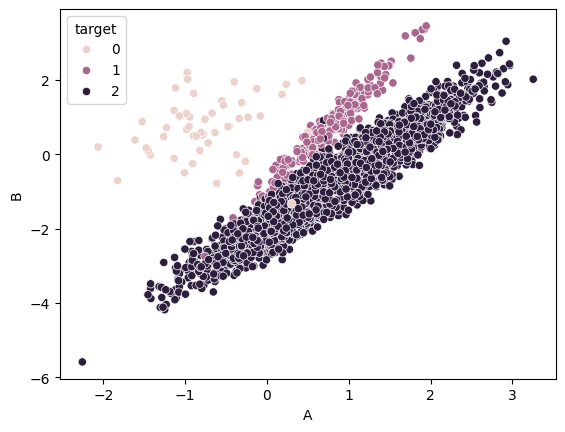

In [273]:
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()
'''.
    this code creates a scatter plot of generated dataset with feature A n x axis & feature B on y- axis
    Since the dataset is highly imbalanced, most points will belong to class 2 (dominant class), while class 0 and class 1 will have very few points.
'''


In [274]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y) #this generates synthetic samples for minority class so that all classes have equal represntation
df = pd.DataFrame(X_resampled, columns=['A', 'B']) #X_resampled (resampled features) is converted into a DataFrame with columns 'A' and 'B'.
df['target'] = y_resampled #y_resampled (new target labels) is added as the 'target' column
# the new df should have balanced class proportions unlike before when class 2 dominated

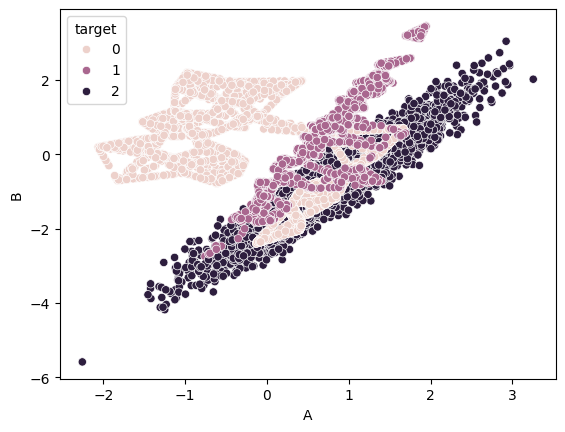

In [275]:
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()

- Again have to be careful about data leakage.  If you do this before train-test split, then some of the synthesized examples could have information from the training and test data, which you would then split into your training and test data
- Don't use on the test data, just test model on unbalanced test data (since you don't have the target variable anyways)
- Recommended to first undersample (say by 50%) to reduce noise and ensure that the newly generated samples' distribution mirror the actual data and then use SMOTE.  SMOTE by itself can generate data that is noisy and does not reflect the underlying distribution of the data
- Different versions of SMOTE to work with mix of categorical and numerical data and data sets with only categorical data
- Try fitting your model first without balancing.  This may be sufficient.  Try with and without.  Just because you have imbalanced data, doesn't mean you have to balance.

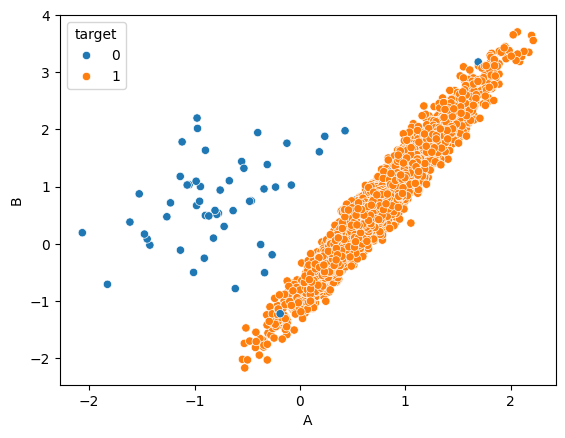

In [276]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.99],
                           class_sep=0.8, random_state=0)
df = pd.DataFrame(X, columns=['A', 'B'])
df['target'] = y        
plt.show()
sns.scatterplot(df, x='A', y='B', hue='target')

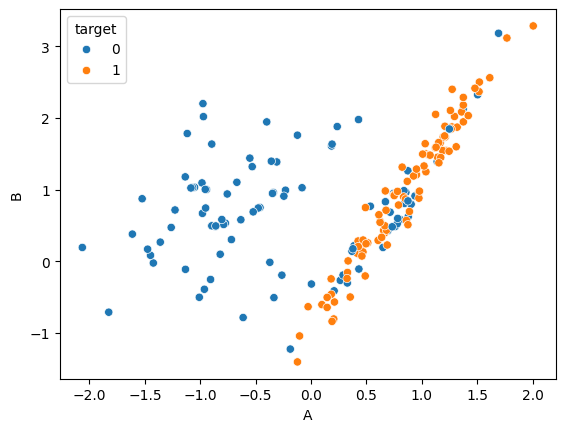

In [277]:
under_X, under_y = RandomUnderSampler(sampling_strategy=0.8).fit_resample(X, y)
smote_X, smote_y = SMOTE().fit_resample(under_X, under_y)
df = pd.DataFrame(smote_X, columns=['A', 'B'])
df['target'] = smote_y
sns.scatterplot(df, x='A', y='B', hue='target')
plt.show()


'''
    balanced data sampling strategy using undersamplng + SMOTE to handle class imbalance
    make_classification() generates a dataset with 99% of data in one class and only 1% in the other (highly imbalanced).
    RandomUnderSampler()- Reduces the majority class before applying SMOTE.
                            This helps reduce noise and ensures synthetic samples better match the real data.
    SMOTE()- Generates synthetic samples for the minority class, balancing the dataset.                       
'''

# [Data Leakage](https://www.ibm.com/think/topics/data-leakage-machine-learning)

1. Train test contamination (vertical leakage???)
    - oversampling or SMOTE before train-test split
    - data preprocessing errors/normalization/standardization
2. target leakage (horizontal leakage???)
    - inclusion of future information (time series)
    - inappropriate feature selection (features included with information about the target)

# Check [errors and data quality](https://www.collibra.com/blog/the-6-dimensions-of-data-quality)

1. Completeness: Is the data filled out?  Easy to check, hard to solve 
- Data missingness
    - Types of missingness (these are horrible names!!)
        - MAR (Missing at random): data is missing at random and there is no pattern to the missingness (price in the housing data is missing)
        - MCAR (Missing completely at random): data is missing, but is missing more for an observed feature of the data than others (price is missing more for certain geographies than others)
        - MNAR (Missing not at random): data is missing, but the missingness is related to an unobserved feature (price is missing above a certain value)

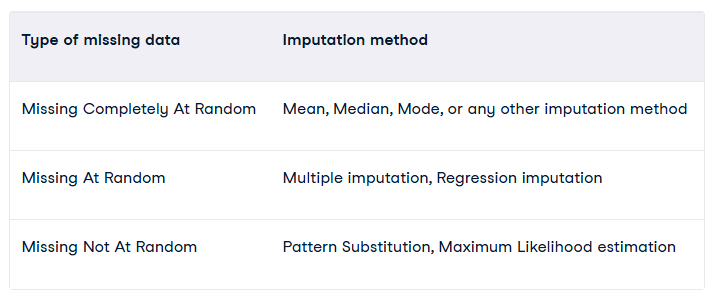

[Image above from this link](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values#choosing-the-right-imputation-method-based-on-the-type-of-missing-data-there)

- Solutions: Imputation Techniques?
    - fill with median or mean.  
    - check the distribution of values first


In [278]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 2004 to 2781
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10864 non-null  object 
 1   Address        10864 non-null  object 
 2   Rooms          10864 non-null  int64  
 3   Type           10864 non-null  object 
 4   Price          10864 non-null  float64
 5   Method         10864 non-null  object 
 6   SellerG        10864 non-null  object 
 7   Date           10864 non-null  object 
 8   Distance       10864 non-null  float64
 9   Postcode       10864 non-null  float64
 10  Bedroom2       10864 non-null  float64
 11  Bathroom       10864 non-null  float64
 12  Car            10810 non-null  float64
 13  Landsize       10864 non-null  float64
 14  BuildingArea   5671 non-null   float64
 15  YearBuilt      6526 non-null   float64
 16  CouncilArea    9808 non-null   object 
 17  Lattitude      10864 non-null  float64
 18  Longtitud

In [279]:
train.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,10864.000000,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10810.000000,10864.000000,5671.000000,6526.000000,10864.000000,10864.000000,10864.000000
mean,2.936487,1.076284e+06,10.111359,3105.276878,2.912831,1.531480,1.610546,515.996502,153.728096,1964.349065,-37.809360,144.994930,7475.049061
std,0.958216,6.403104e+05,5.847678,90.830218,0.972249,0.691956,0.961099,1127.660036,603.479157,37.569089,0.078950,0.103618,4406.332145
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,175.000000,92.000000,1940.000000,-37.856800,144.929923,4380.000000
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802700,145.000200,6567.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756707,145.057300,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,44500.000000,44515.000000,2017.000000,-37.453920,145.526350,21650.000000


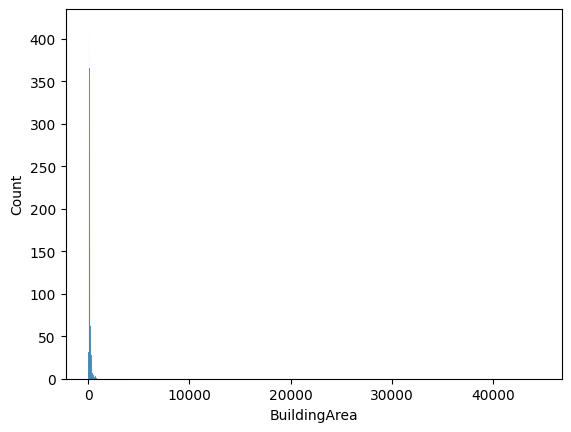

In [280]:
sns.histplot(train, x='BuildingArea')
plt.show()

c:\Users\mgilbert\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


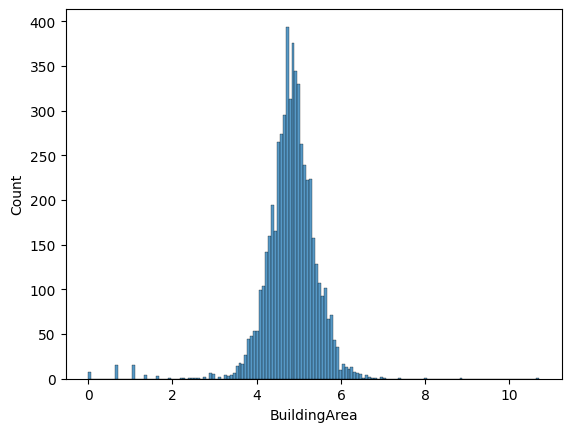

In [281]:
sns.histplot(np.log(train['BuildingArea']))
plt.show()

In [282]:
train['FilledBuildingArea'] = train['BuildingArea'].fillna(train['BuildingArea'].median())
train['LogFilledBuildingArea'] = np.log(train['BuildingArea'].fillna(train['BuildingArea'].median()))
train['ba_missing'] = pd.isna(train['BuildingArea'])

c:\Users\mgilbert\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


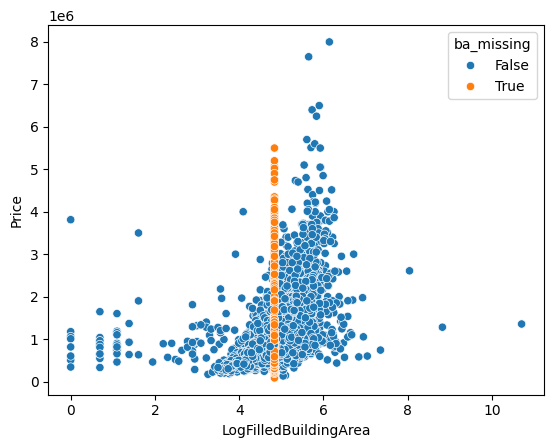

In [283]:
sns.scatterplot(train, x='LogFilledBuildingArea', y='Price', hue='ba_missing')
plt.show()

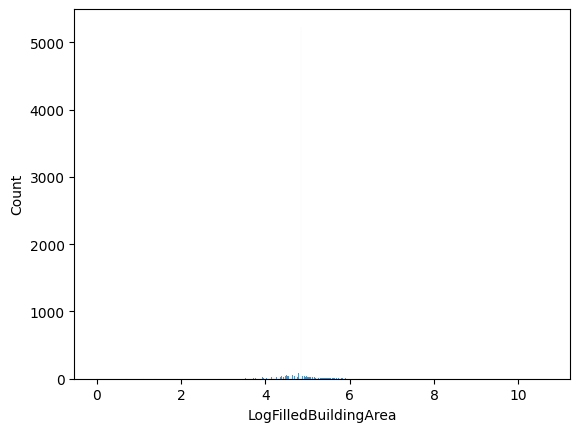

In [284]:
sns.histplot(train['LogFilledBuildingArea'])
plt.show()

- fill with another technique (MICE (Multivariate Imputation by Chained Equations))
- this assumes MAR

- Solutions: Dropping values?

In [285]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10864 entries, 2004 to 2781
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 10864 non-null  object 
 1   Address                10864 non-null  object 
 2   Rooms                  10864 non-null  int64  
 3   Type                   10864 non-null  object 
 4   Price                  10864 non-null  float64
 5   Method                 10864 non-null  object 
 6   SellerG                10864 non-null  object 
 7   Date                   10864 non-null  object 
 8   Distance               10864 non-null  float64
 9   Postcode               10864 non-null  float64
 10  Bedroom2               10864 non-null  float64
 11  Bathroom               10864 non-null  float64
 12  Car                    10810 non-null  float64
 13  Landsize               10864 non-null  float64
 14  BuildingArea           5671 non-null   float64
 15  YearB

In [286]:
train.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 143 to 3309
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 4954 non-null   object 
 1   Address                4954 non-null   object 
 2   Rooms                  4954 non-null   int64  
 3   Type                   4954 non-null   object 
 4   Price                  4954 non-null   float64
 5   Method                 4954 non-null   object 
 6   SellerG                4954 non-null   object 
 7   Date                   4954 non-null   object 
 8   Distance               4954 non-null   float64
 9   Postcode               4954 non-null   float64
 10  Bedroom2               4954 non-null   float64
 11  Bathroom               4954 non-null   float64
 12  Car                    4954 non-null   float64
 13  Landsize               4954 non-null   float64
 14  BuildingArea           4954 non-null   float64
 15  YearBui

In [287]:
train.dropna(subset=['BuildingArea']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 5671 entries, 143 to 3309
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Suburb                 5671 non-null   object 
 1   Address                5671 non-null   object 
 2   Rooms                  5671 non-null   int64  
 3   Type                   5671 non-null   object 
 4   Price                  5671 non-null   float64
 5   Method                 5671 non-null   object 
 6   SellerG                5671 non-null   object 
 7   Date                   5671 non-null   object 
 8   Distance               5671 non-null   float64
 9   Postcode               5671 non-null   float64
 10  Bedroom2               5671 non-null   float64
 11  Bathroom               5671 non-null   float64
 12  Car                    5645 non-null   float64
 13  Landsize               5671 non-null   float64
 14  BuildingArea           5671 non-null   float64
 15  YearBui

- be very careful around imputation
- must save your results and impute the same way on new data
- general rule of thumb: don't call .fit on test data only .transform

In [288]:
from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='constant', fill_value=0)
imputer = SimpleImputer(strategy='median')
ba = train[['BuildingArea']]
imputer.fit(ba)
null_rows_idx = pd.isna(train[['BuildingArea']])
X_nulls = imputer.transform(train[['BuildingArea']])
X_nulls[null_rows_idx]

array([126., 126., 126., ..., 126., 126., 126.])

2. Accuracy: Is the data correct?  This can be difficult to measure and sometimes requires time and manual effort to ascertain.

3. Consistency: Is a particular columns of data or feature consistent with others for the same observation?  e.g. Does longitude/latitude match zip code?

4. Validity: Is a particular feature or column valid data.  Easier to inspect than accuracy.  In accuracy, data can appear correct, but in validity data has notable issues that can be discovered through inspection of the data alone.
- Check ranges of data
- Check statistics of data
- Check values of data
- Check the units of data

In [289]:
train['Suburb'].value_counts()

Suburb
Reservoir             301
Richmond              213
Bentleigh East        197
Brunswick             191
Essendon              181
                     ... 
Beaconsfield Upper      1
Mount Evelyn            1
Silvan                  1
Brookfield              1
North Warrandyte        1
Name: count, Length: 311, dtype: int64

In [290]:
train.drop(['LogFilledBuildingArea'], axis=1).describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,FilledBuildingArea
count,10864.000000,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10810.000000,10864.000000,5671.000000,6526.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,2.936487,1.076284e+06,10.111359,3105.276878,2.912831,1.531480,1.610546,515.996502,153.728096,1964.349065,-37.809360,144.994930,7475.049061,140.474046
std,0.958216,6.403104e+05,5.847678,90.830218,0.972249,0.691956,0.961099,1127.660036,603.479157,37.569089,0.078950,0.103618,4406.332145,436.212364
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000000
25%,2.000000,6.500000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,175.000000,92.000000,1940.000000,-37.856800,144.929923,4380.000000,123.000000
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802700,145.000200,6567.000000,126.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756707,145.057300,10331.000000,129.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,44500.000000,44515.000000,2017.000000,-37.453920,145.526350,21650.000000,44515.000000


5. Uniqueness: Is the data duplicate?  Might want to figure out why data is duplicate before deduplicating
- Probably best to drop duplicates before splitting.  Might be in error
- Check duplicates. Check data uniqueness (duplicates)
    - pd.duplicated
    - pd.drop_duplicates

In [291]:
duplicates = train.duplicated(subset=['Address', 'Date'], keep=False)
train[duplicates].sort_values('Address')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,target,FilledBuildingArea,LogFilledBuildingArea,ba_missing
7769,Coburg,69 Victoria St,3,t,720000.0,PI,C21,29/04/2017,7.8,3058.0,...,2016.0,Moreland,-37.74240,144.95710,Northern Metropolitan,11204.0,not_eastern_metro,112.0,4.718499,False
7770,Coburg,69 Victoria St,3,t,720000.0,PI,Century,29/04/2017,7.8,3058.0,...,2016.0,Moreland,-37.74240,144.95710,Northern Metropolitan,11204.0,not_eastern_metro,112.0,4.718499,False
9948,Malvern East,8 Vickery St,4,h,3600000.0,S,Marshall,24/06/2017,8.4,3145.0,...,2015.0,Stonnington,-37.87421,145.04958,Southern Metropolitan,8801.0,not_eastern_metro,355.0,5.872118,False
9793,Bentleigh,8 Vickery St,5,h,1900000.0,VB,Buxton,24/06/2017,11.4,3204.0,...,NaN,Glen Eira,-37.91753,145.03907,Southern Metropolitan,6795.0,not_eastern_metro,126.0,4.836282,True


In [292]:
train.shape

(10864, 25)

In [293]:
train.drop_duplicates(subset=['Address']).shape

(10739, 25)

6. integrity: data stored across systems is consistent

# Exploratory Data Analysis (EDA)

## Check data types

In [294]:
train.dtypes

Suburb                    object
Address                   object
Rooms                      int64
Type                      object
Price                    float64
Method                    object
SellerG                   object
Date                      object
Distance                 float64
Postcode                 float64
Bedroom2                 float64
Bathroom                 float64
Car                      float64
Landsize                 float64
BuildingArea             float64
YearBuilt                float64
CouncilArea               object
Lattitude                float64
Longtitude               float64
Regionname                object
Propertycount            float64
target                    object
FilledBuildingArea       float64
LogFilledBuildingArea    float64
ba_missing                  bool
dtype: object

## Check summary statistics

In [295]:
train.describe()

c:\Users\mgilbert\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,FilledBuildingArea,LogFilledBuildingArea
count,10864.000000,1.086400e+04,10864.000000,10864.000000,10864.000000,10864.000000,10810.000000,10864.000000,5671.000000,6526.000000,10864.000000,10864.000000,10864.000000,10864.000000,1.086400e+04
mean,2.936487,1.076284e+06,10.111359,3105.276878,2.912831,1.531480,1.610546,515.996502,153.728096,1964.349065,-37.809360,144.994930,7475.049061,140.474046,-inf
std,0.958216,6.403104e+05,5.847678,90.830218,0.972249,0.691956,0.961099,1127.660036,603.479157,37.569089,0.078950,0.103618,4406.332145,436.212364,NaN
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,0.000000,-inf
25%,2.000000,6.500000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,175.000000,92.000000,1940.000000,-37.856800,144.929923,4380.000000,123.000000,4.812184e+00
50%,3.000000,9.020000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802700,145.000200,6567.000000,126.000000,4.836282e+00
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,174.000000,1999.000000,-37.756707,145.057300,10331.000000,129.000000,4.859812e+00
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,44500.000000,44515.000000,2017.000000,-37.453920,145.526350,21650.000000,44515.000000,1.070358e+01


## Correlations

In [296]:
train.corr(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,FilledBuildingArea,LogFilledBuildingArea,ba_missing
Rooms,1.000000,0.505278,0.293882,0.060162,0.941070,0.595854,0.412918,0.090719,0.120455,-0.066724,0.008317,0.099307,-0.079740,0.090172,0.451998,-0.043306
Price,0.505278,1.000000,-0.166355,0.105761,0.480361,0.472147,0.231653,0.055156,0.085582,-0.324386,-0.210888,0.200844,-0.040680,0.065415,0.364374,-0.004699
Distance,0.293882,-0.166355,1.000000,0.435737,0.293765,0.125075,0.267337,0.117442,0.107737,0.250893,-0.142012,0.238504,-0.052818,0.079694,0.160634,0.000921
Postcode,0.060162,0.105761,0.435737,1.000000,0.063863,0.112463,0.054812,0.074881,0.060635,0.036911,-0.414239,0.445577,0.066841,0.043902,0.057441,0.006361
Bedroom2,0.941070,0.480361,0.293765,0.063863,1.000000,0.585282,0.409580,0.089694,0.118748,-0.053514,0.010864,0.099390,-0.080172,0.087505,0.433439,-0.037971
Bathroom,0.595854,0.472147,0.125075,0.112463,0.585282,1.000000,0.325346,0.077876,0.106113,0.145864,-0.072509,0.113554,-0.047925,0.083246,0.367441,-0.099331
Car,0.412918,0.231653,0.267337,0.054812,0.409580,0.325346,1.000000,0.112632,0.097657,0.104978,0.003374,0.059208,-0.025187,0.069168,0.231082,0.002993
Landsize,0.090719,0.055156,0.117442,0.074881,0.089694,0.077876,0.112632,1.000000,0.514682,0.042953,0.034455,0.009970,-0.017330,0.371722,0.089895,0.017624
BuildingArea,0.120455,0.085582,0.107737,0.060635,0.118748,0.106113,0.097657,0.514682,1.000000,0.017864,0.051647,-0.030458,-0.028163,1.000000,0.252460,NaN
YearBuilt,-0.066724,-0.324386,0.250893,0.036911,-0.053514,0.145864,0.104978,0.042953,0.017864,1.000000,0.053467,-0.004407,0.009517,0.014402,-0.018638,0.027873


# Plots

## Boxplots

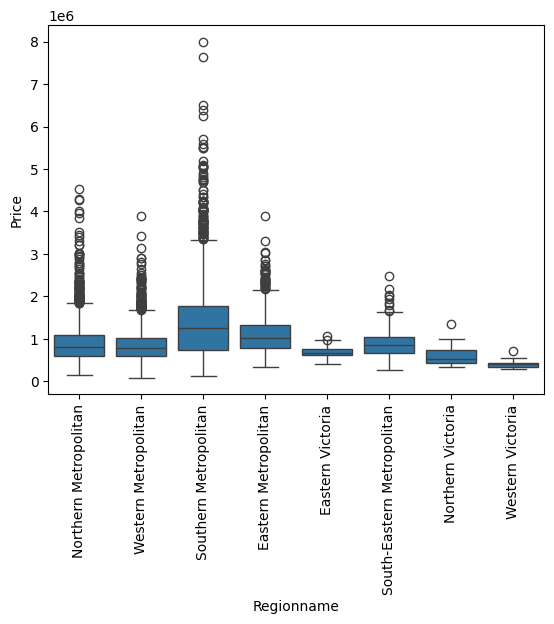

In [297]:
sns.boxplot(train, x='Regionname', y='Price')
plt.xticks(rotation=90)
plt.show()

## Pairplot

In [298]:
sample, _ = train_test_split(train.iloc[:,0:10], train_size=0.10, random_state=42)
sample.shape

(1086, 10)

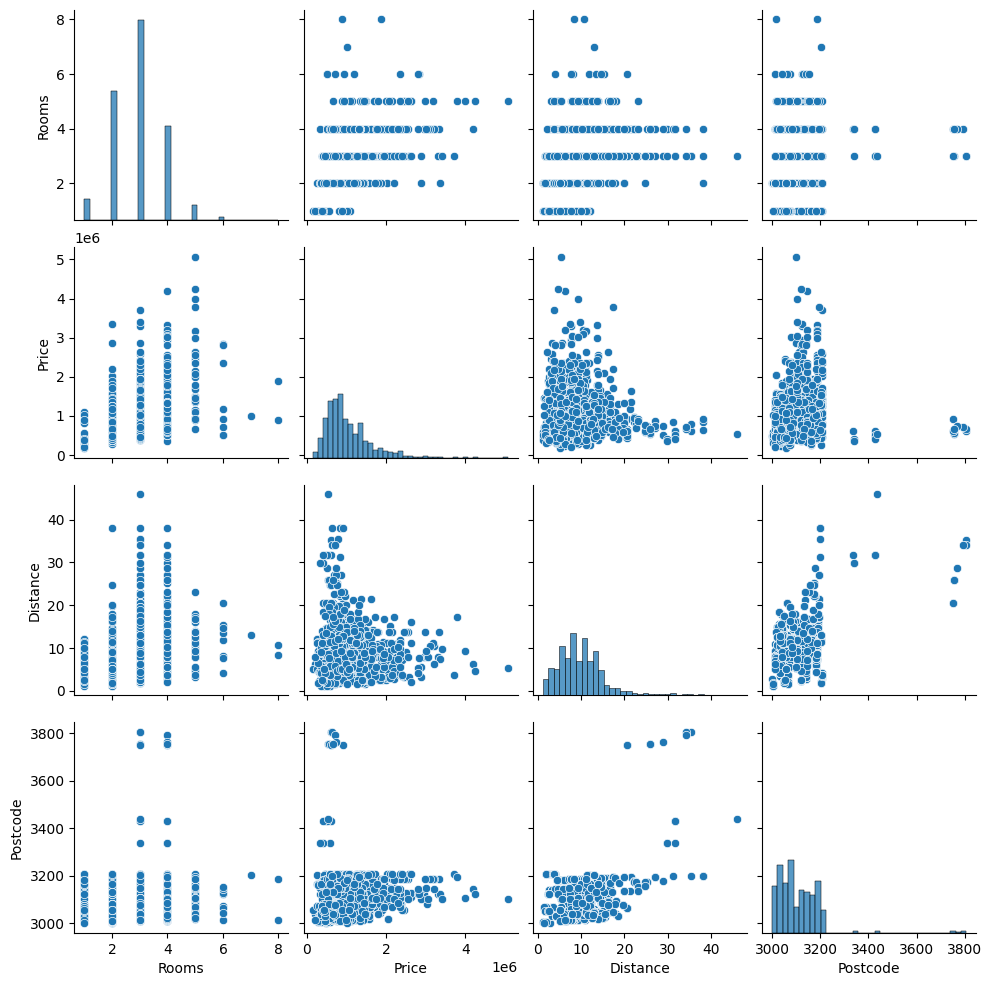

In [299]:
sns.pairplot(sample.select_dtypes(['float', 'int']))
plt.show()

# Check Skewness

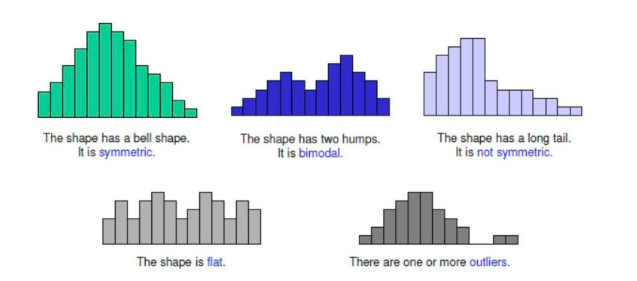

## Normal

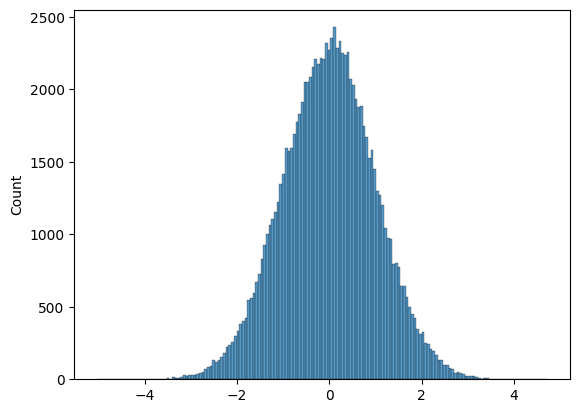

In [300]:
sns.histplot(np.random.standard_normal(100000))
plt.show()

## Right Skewed

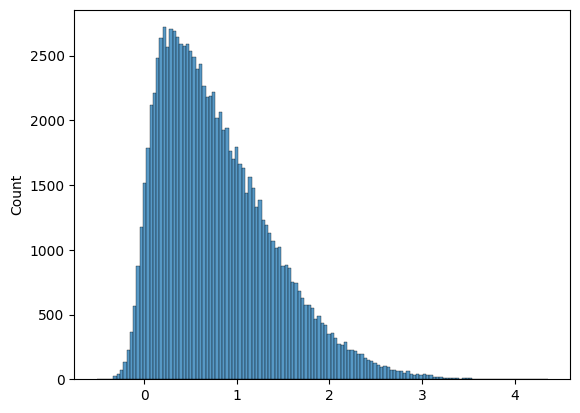

In [301]:
from scipy.stats import skewnorm
r = skewnorm.rvs(8, size=100000)
sns.histplot(r)
plt.show()

## Left Skewed

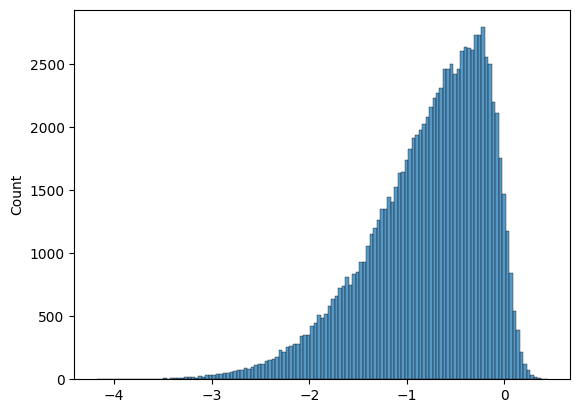

In [302]:
r = skewnorm.rvs(-8, size=100000)
sns.histplot(r)
plt.show()

## Left or Right Skewed

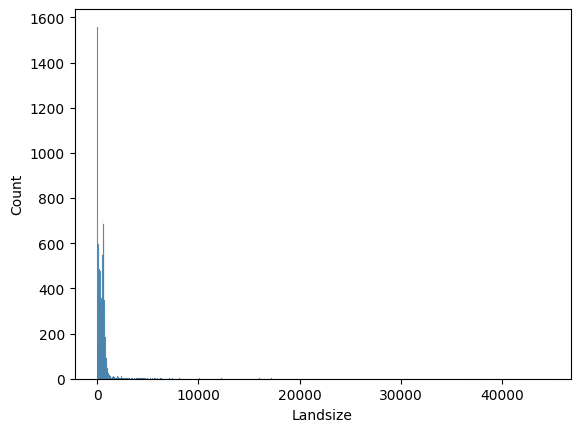

In [303]:
sns.histplot(train['Landsize'])
plt.show()

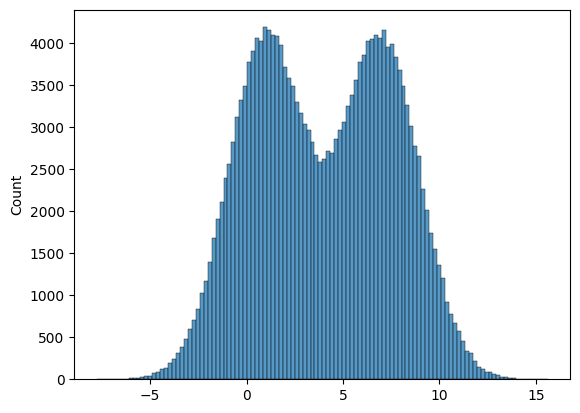

In [304]:
a = np.random.standard_normal(100000) * 2 + 7
b = np.random.standard_normal(100000) * 2 + 1
sns.histplot(np.concatenate([a,b]))
plt.show()

# Feature Engineering

## Categorical Data

### Ordinal Encoding

- Encode each categorical feature as an integer
- Usually use with low cardinality data, if at all
- But one-hot encoding is better
- Real issue is that it implies an order to unordered data (is Western Metropolitan greater than Eastern Metropolitan?)

In [305]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

oe = OrdinalEncoder()
council_area_ordinal = oe.fit_transform(train[['CouncilArea']])
council_area_ordinal

array([[23.],
       [10.],
       [nan],
       ...,
       [ 6.],
       [ 0.],
       [ 2.]])

In [306]:
oe.categories_

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
        'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
        'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
        'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
        'Monash', 'Moonee Valley', 'Moorabool', 'Moreland', 'Nillumbik',
        'Port Phillip', 'Stonnington', 'Unavailable', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges', nan],
       dtype=object)]

### One-hot Encoding

- Each category becomes a feature
- Can create very sparse data
- For both of these, keep track of how you approached this and complete the same transformation on new data
- Letting the encoder see categories in the test set is also ***data leakage!!!***

In [307]:
ohe = OneHotEncoder()
council_area_one_hot = ohe.fit_transform(train[['CouncilArea']])
council_area_one_hot.toarray().shape

(10864, 34)

In [308]:
df_output = pd.DataFrame(council_area_one_hot.toarray(), columns = ohe.categories_, index=train.index)
df_output

,Banyule,Bayside,Boroondara,Brimbank,Cardinia,Casey,Darebin,Frankston,Glen Eira,Greater Dandenong,...,Nillumbik,Port Phillip,Stonnington,Unavailable,Whitehorse,Whittlesea,Wyndham,Yarra,Yarra Ranges,NaN
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1171,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4396,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
ohe.get_feature_names_out()

array(['CouncilArea_Banyule', 'CouncilArea_Bayside',
       'CouncilArea_Boroondara', 'CouncilArea_Brimbank',
       'CouncilArea_Cardinia', 'CouncilArea_Casey', 'CouncilArea_Darebin',
       'CouncilArea_Frankston', 'CouncilArea_Glen Eira',
       'CouncilArea_Greater Dandenong', 'CouncilArea_Hobsons Bay',
       'CouncilArea_Hume', 'CouncilArea_Kingston', 'CouncilArea_Knox',
       'CouncilArea_Macedon Ranges', 'CouncilArea_Manningham',
       'CouncilArea_Maribyrnong', 'CouncilArea_Maroondah',
       'CouncilArea_Melbourne', 'CouncilArea_Melton',
       'CouncilArea_Monash', 'CouncilArea_Moonee Valley',
       'CouncilArea_Moorabool', 'CouncilArea_Moreland',
       'CouncilArea_Nillumbik', 'CouncilArea_Port Phillip',
       'CouncilArea_Stonnington', 'CouncilArea_Unavailable',
       'CouncilArea_Whitehorse', 'CouncilArea_Whittlesea',
       'CouncilArea_Wyndham', 'CouncilArea_Yarra',
       'CouncilArea_Yarra Ranges', 'CouncilArea_nan'], dtype=object)

### CountVectorization

- Used in natural language process (NLP)
- One column for every word in your vocab
- One row for every document

In [310]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

training_data = [('negative', 'just plain boring'),
                  ('negative', 'entirely predictable and lacks energy'),
                  ('negative', 'no surprises and very few laughs'),
                  ('positive', 'very powerful'),
                  ('positive', 'the most fun film of the summer')]

test_data = [('', 'predictable with no fun')]
# Put all documents and labels in separate lists
docs = [d for c,d in training_data]
cats = [c for c,d in training_data]

In [311]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)
X = X.toarray()
# Turn into data frame for display purposes
X_df = pd.DataFrame(X,columns=vectorizer.get_feature_names_out(), index=docs)
X_df

,and,boring,energy,entirely,few,film,fun,just,lacks,laughs,most,no,of,plain,powerful,predictable,summer,surprises,the,very
just plain boring,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
entirely predictable and lacks energy,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
no surprises and very few laughs,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1
very powerful,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
the most fun film of the summer,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,2,0


### Tf-IDF (term frequency-inverse document frequency)

- Weighted version of count vectorizer

**Term frequency (tf) in the tf-idf algorithm**

We could imagine using raw count:
- $\text{tf}_{t,d} = \text{count}(t,d)$

But instead of using raw count, we usually squash a bit:

- $\text{tf}_{t,d} = 1 + \log_{10}\text{count}(t,d)$ if $\text{count}(t,d)>0$ else $0$

**Inverse document frequency (idf)**

- $\text{idf}_t = \log_{10} (\frac{N}{\text{df}_t})$

N is the total number of documents in the collection

**Final tf-idf weighted value for a word**

- $w_{t,d}=\text{tf}_{t,d} \times \text{idf}_t$

In [312]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(docs)
X = X.toarray()
# Turn into data frame for display purposes
X_df = pd.DataFrame(X,columns=vectorizer.get_feature_names_out(), index=docs)
X_df

,and,and lacks,and very,boring,energy,entirely,entirely predictable,few,few laughs,film,...,predictable and,summer,surprises,surprises and,the,the most,the summer,very,very few,very powerful
just plain boring,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
entirely predictable and lacks energy,0.274304,0.339992,0.000000,0.000000,0.339992,0.339992,0.339992,0.000000,0.000000,0.000000,...,0.339992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
no surprises and very few laughs,0.251365,0.000000,0.311561,0.000000,0.000000,0.000000,0.000000,0.311561,0.311561,0.000000,...,0.000000,0.000000,0.311561,0.311561,0.000000,0.000000,0.000000,0.251365,0.311561,0.000000
very powerful,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.495524,0.000000,0.614189
the most fun film of the summer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258199,...,0.000000,0.258199,0.000000,0.000000,0.516398,0.258199,0.258199,0.000000,0.000000,0.000000


## Numeric Data

### Transformation of Data

- Good to log transform highly skewed data

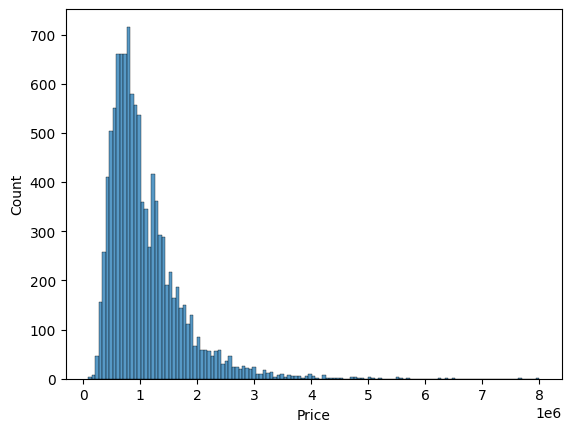

In [313]:
sns.histplot(train, x='Price')
plt.show()

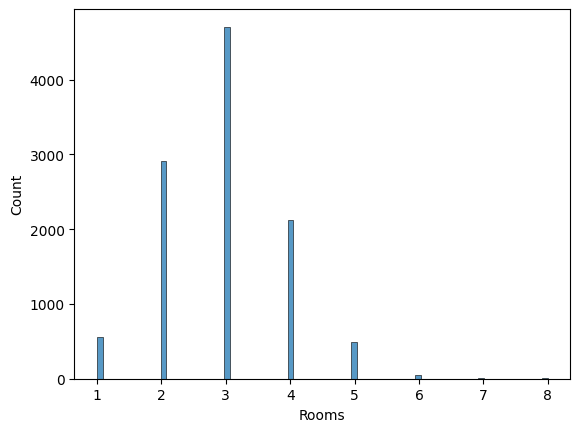

In [314]:
sns.histplot(train, x='Rooms')
plt.show()

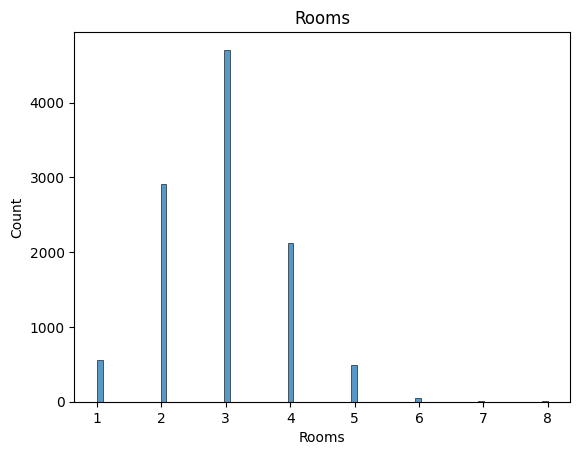

In [315]:
for c in train.select_dtypes(['int', 'float']).columns:
    if not 'Filled' in c:
        sns.histplot(train, x=c)
        plt.title(c)
        plt.show()
        break

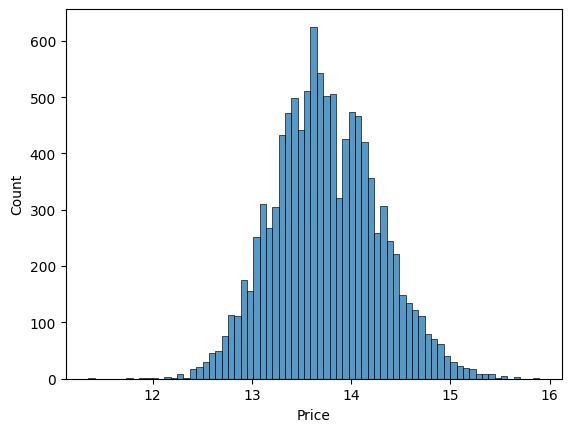

In [316]:
sns.histplot(np.log(train['Price']))
plt.show()

# Outliers

- Data can have outliers which can affect different models
- Need to evaluate a value to determine if it is actually an outlier
    - Is the value an outlier in 1 dimension 
    - Is the value an outlier in 2 dimensions?
- Like balancing the data set, it is best to try to fit your model first with outliers and see how it performs

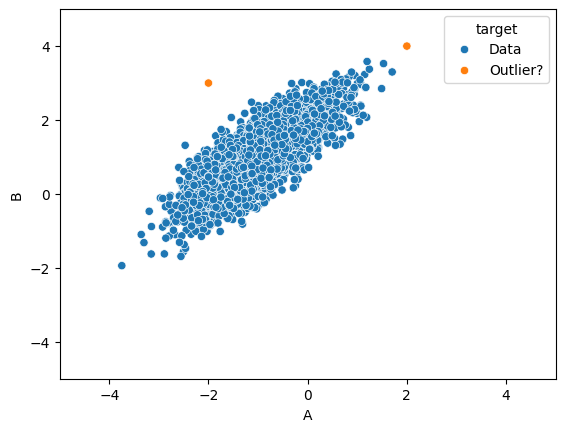

In [317]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=1,
                           n_clusters_per_class=1,
                           weights=[1], random_state=2)

df = pd.DataFrame(X, columns=['A', 'B'])
df['target'] = ['Data']*len(y)
df = pd.concat([df, pd.DataFrame([(-2, 3, 'Outlier?'),(2, 4, 'Outlier?')], columns=['A', 'B', 'target'])])
df.head()
sns.scatterplot(df, x='A', y='B', hue='target')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

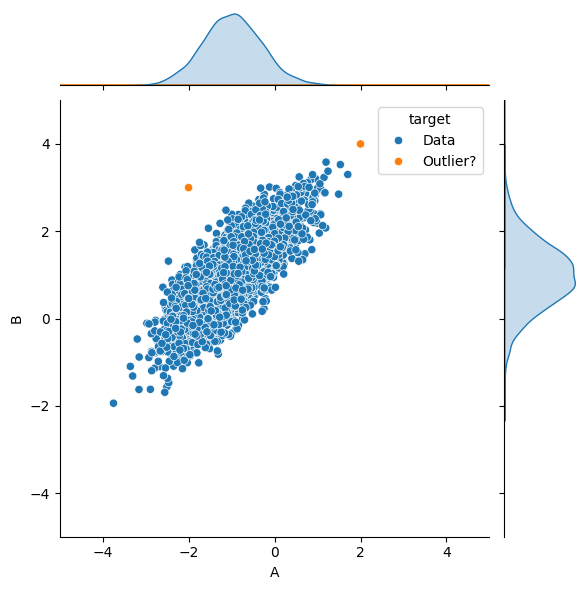

In [318]:
sns.jointplot(df, x='A', y='B', hue='target')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Outlier Solutions

- Most basic solution is to remove the outliers, but like imputation this can be risky and requires more analysis (outside the scope of this class)
    - Basic way is to look at the standard deviation
    - Like any other transformation, you have to store the value you filtered by and save the value you "learned" on the training data to apply to the test data
- Can also cap the outliers or create bucketed category.  
    - Maybe you don't care about predicting really large prices because they are outside of your price range anyways
    - Maybe all loans larger than a certain amount trigger a manual review anyways
- Much more sophisticated techniques for removing outliers, outside the scope of this class.
    - Best to leave them in, or fit multiple versions of a model 

In [325]:
print(train.shape)
upper = train['BuildingArea'].quantile(.999)
lower = train['BuildingArea'].quantile(.001)
print(lower,upper)
train_clipped = train[train['BuildingArea'] < upper].copy()
train_clipped = train_clipped[train_clipped['BuildingArea'] > lower]
train_clipped.shape

(10864, 25)
0.0 1028.270000000016


(5655, 25)

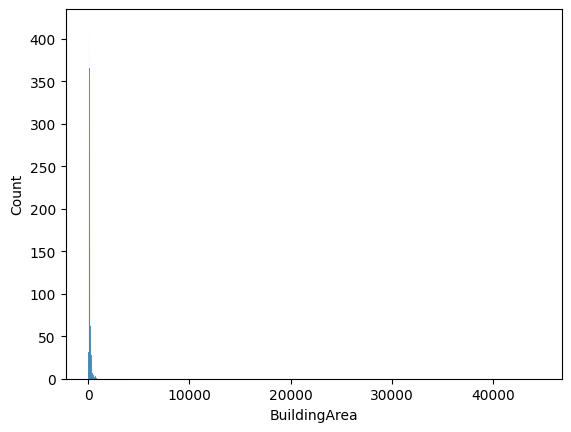

In [326]:
sns.histplot(train, x='BuildingArea')
plt.show()

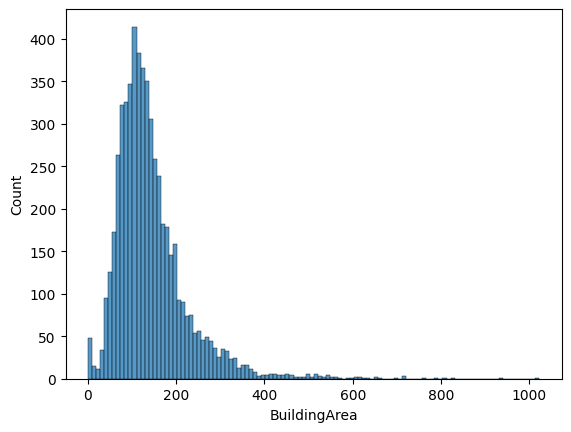

In [327]:
sns.histplot(train_clipped, x='BuildingArea')
plt.show()

## Cyclic values
- Circular or cyclic values include dimensions such as days of the week.
- Problem with values such as day of the year is that the value at the end of the year (365) is farthest from the first value even though the 1st of the year is the next day
- Best to have a transformation that reflects that values near the end of the cycle (day of week, day of year, hour of day) are just as close to values at the beginning of the cycle

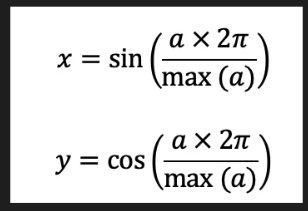

In [329]:
train['Date']

2004     25/02/2017
143       4/02/2016
12410     3/09/2017
1171      4/06/2016
11285    15/07/2017
            ...    
13429    26/08/2017
10279    27/05/2017
4396      4/03/2017
3309     22/05/2016
2781     10/12/2016
Name: Date, Length: 10864, dtype: object

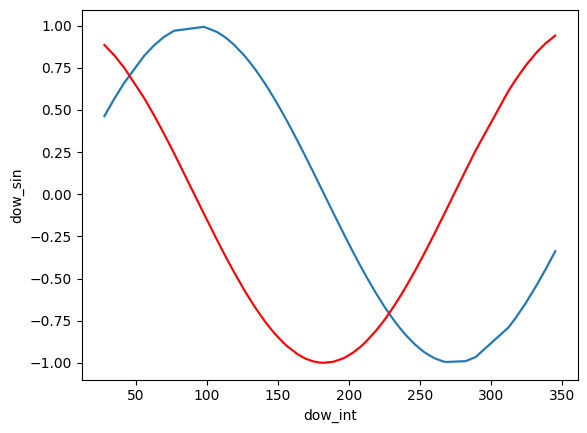

In [336]:
train['date_formatted'] = pd.to_datetime(train['Date'], format='%d/%m/%Y')
train['dow_int'] = train['date_formatted'].dt.dayofyear
train['dow_sin'] = np.sin(train['dow_int'] * (2 * np.pi / 365))
train['dow_cos'] = np.cos(train['dow_int'] * (2 * np.pi / 365))
sns.lineplot(train, x='dow_int', y='dow_sin')
sns.lineplot(train, x='dow_int', y='dow_cos', color='red')
plt.show()

## Combining features
- cross features
- more feature combination to come with PCA

In [337]:
train['rooms_per_building_area'] = train['Rooms']/train['BuildingArea']
train['rooms_per_building_area']

2004          NaN
143      0.016000
12410    0.021739
1171          NaN
11285    0.031250
           ...   
13429    0.012397
10279    0.027397
4396          NaN
3309     0.166667
2781          NaN
Name: rooms_per_building_area, Length: 10864, dtype: float64

## Polynomial features

- Add x squared, cubed, etc

In [341]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(train[['Price', 'BuildingArea']].fillna(0))
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(), index=train.index)
poly_df.head()

,Price,BuildingArea,Price^2,Price BuildingArea,BuildingArea^2,Price^3,Price^2 BuildingArea,Price BuildingArea^2,BuildingArea^3
2004,845000.0,0.0,7.140250e+11,0.0,0.0,6.033511e+17,0.000000e+00,0.000000e+00,0.0
143,720000.0,125.0,5.184000e+11,90000000.0,15625.0,3.732480e+17,6.480000e+13,1.125000e+10,1953125.0
12410,705000.0,138.0,4.970250e+11,97290000.0,19044.0,3.504026e+17,6.858945e+13,1.342602e+10,2628072.0
1171,980000.0,0.0,9.604000e+11,0.0,0.0,9.411920e+17,0.000000e+00,0.000000e+00,0.0
11285,1070000.0,96.0,1.144900e+12,102720000.0,9216.0,1.225043e+18,1.099104e+14,9.861120e+09,884736.0


# Scaling data
- Why do we scale data?
- What algorithms is it necessary for and which is it not?

- Normalization/min-max scaling
- Standardization
- Outliers affect on scaling of data

## Why Do We Scale Data?

- Stability – since computers have a limit to precision very small numbers and very large numbers can lose resolution.  In other words there are fewer values between 100000.0-100000.1 and 0.0-0.1.
- Gradients and hyper parameters – when feature values or labels are very large or very small tuning parameters such as learning rate can be unpredictably tricky.  Algorithms requiring a gradient calculation.
- Spatial similarity – In some algorithms features with very large or small values can be overly weighted. 


## What algorithms is it necessary for and which is it not?

- Scale:
    - Linear regression
    - Logistic regression
    - Ridge regression
    - Can be helpful for neural networks
    - K-means clustering
    - SVM (not as important to scale, but may be helpful)
- To Not Scale:
    - Tree based algorithms

## Normalization/Min-Max Scaling
- Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.
- Normalization requires that you know or are able to accurately estimate the minimum and maximum observable values. You may be able to estimate these values from your available data.


In [345]:
from sklearn.preprocessing import MinMaxScaler

X_num = train[['Price', 'BuildingArea', 'Rooms']]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X_num_min_max_scaled = min_max_scaler.fit_transform(X_num)
min_max_df = pd.DataFrame(X_num_min_max_scaled, columns=min_max_scaler.get_feature_names_out(), index=X_num.index)
min_max_df

,Price,BuildingArea,Rooms
2004,-0.807960,NaN,-0.428571
143,-0.839545,-0.994384,-0.714286
12410,-0.843335,-0.993800,-0.428571
1171,-0.773847,NaN,-0.714286
11285,-0.751105,-0.995687,-0.428571
...,...,...,...
13429,-0.729627,-0.989127,-0.428571
10279,-0.849653,-0.996720,-0.714286
4396,-0.684144,NaN,-0.428571
3309,-0.858181,-0.999191,-0.428571


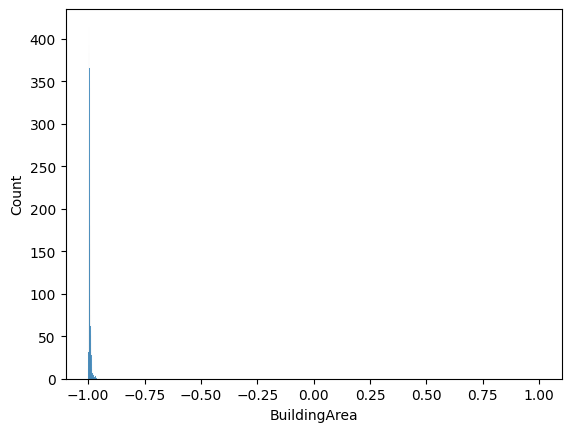

In [347]:
sns.histplot(min_max_df, x='BuildingArea')
plt.show()

## Standardization

- Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. It is sometimes referred to as “whitening.”
- This can be thought of as subtracting the mean value or centering the data.
- Like normalization, standardization can be useful, and even required in some machine learning algorithms when your data has input values with differing scales.
- Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.
- Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.


In [348]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_num_std_scaled = std_scaler.fit_transform(X_num)
stand_df = pd.DataFrame(X_num_std_scaled, columns=std_scaler.get_feature_names_out(), index=X_num.index)
stand_df

,Price,BuildingArea,Rooms
2004,-0.361223,NaN,0.066285
143,-0.556450,-0.047608,-0.977368
12410,-0.579877,-0.026065,0.066285
1171,-0.150378,NaN,-0.977368
11285,-0.009815,-0.095667,0.066285
...,...,...,...
13429,0.122939,0.146285,0.066285
10279,-0.618923,-0.133783,-0.977368
4396,0.404066,NaN,0.066285
3309,-0.671634,-0.224929,0.066285


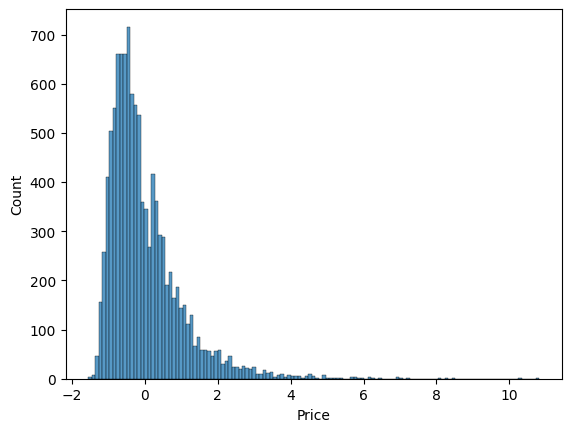

In [350]:
sns.histplot(stand_df, x='Price')
plt.show()

## Outliers and Scaling

- Outliers can have large effect on the scaling of data
- Best to use standardization.  Min max may really squash the data, if the max is really big, because it has a fixed range and Standardization does not.

# Put it in a Pipeline!!

- Best to include all transformations in a pipeline to save for later


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

#never call fit on train data.
num_attribs = ['Price', 'BuildingArea']
cat_attribs = ["CouncilArea"]
cut_attrib = ['Rooms']


class CutTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bins, labels):  # no *args or **kwargs!
        self.bins = bins
        self.labels = labels

    def fit(self, X, y=None):
        self.feature_names = [X.columns[0]]
        return self

    def get_feature_names_out(self, feature_names_out):
        return self.feature_names

    def transform(self, X):
        return pd.DataFrame(pd.cut(X.iloc[:, 0], bins=self.bins, labels=self.labels).astype(str))



num_pipeline = Pipeline([

    ("impute", SimpleImputer(strategy="median")),

    ("standardize", StandardScaler()),

])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False))

cut_pipeline = Pipeline([('cut', CutTransformer(
    bins=[0, 2, 4, 10], labels=['small', 'medium', 'large']))])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
    ('cut', cut_pipeline, cut_attrib)
])

trans_data = preprocessing.fit_transform(train)
pd.DataFrame(
    trans_data, columns=preprocessing.get_feature_names_out(), index=train.index)

,num__Price,num__BuildingArea,cat__CouncilArea_Banyule,cat__CouncilArea_Bayside,cat__CouncilArea_Boroondara,cat__CouncilArea_Brimbank,cat__CouncilArea_Cardinia,cat__CouncilArea_Casey,cat__CouncilArea_Darebin,cat__CouncilArea_Frankston,...,cat__CouncilArea_Nillumbik,cat__CouncilArea_Port Phillip,cat__CouncilArea_Stonnington,cat__CouncilArea_Unavailable,cat__CouncilArea_Whitehorse,cat__CouncilArea_Whittlesea,cat__CouncilArea_Wyndham,cat__CouncilArea_Yarra,cat__CouncilArea_Yarra Ranges,cut__Rooms_cut
2004,-0.361223,-0.033183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
143,-0.55645,-0.035475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
12410,-0.579877,-0.005672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
1171,-0.150378,-0.033183,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,small
11285,-0.009815,-0.10196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13429,0.122939,0.232755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
10279,-0.618923,-0.154689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,small
4396,0.404066,-0.033183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
3309,-0.671634,-0.28078,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium


# Custom Function Transformer

- recommend you wrap in a pd.DataFrame
- may need to provide column names

In [405]:
date_transformer = FunctionTransformer(lambda X:pd.DataFrame(pd.to_datetime(X.loc[:,'Date'], format='%d/%m/%Y').dt.day_of_year))
test = date_transformer.fit_transform(train)
test

,Date
2004,56
143,35
12410,246
1171,156
11285,196
...,...
13429,238
10279,147
4396,63
3309,143
